In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
# Check the Python version
import sys
if sys.version.startswith("3."):
  print("You are running Python 3. Good job :)")
else:
  print("This notebook requires Python 3.\nIf you are using Google Colab, go to Runtime > Change runtime type and choose Python 3.")

You are running Python 3. Good job :)


In [3]:
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False
if IN_COLAB:
  # Clone the entire repo to access the files.
  !git clone -l -s https://github.com/epfml/OptML_course.git cloned-repo
  %cd cloned-repo/labs/ex02/template/

# Load the data

In [4]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
b, A = build_model_data(x, weight)

In [5]:
print('Number of samples n = ', b.shape[0])
print('Dimension of each sample d = ', A.shape[1])

Number of samples n =  10000
Dimension of each sample d =  2


# Least Squares Estimation
Least squares estimation is one of the fundamental machine learning algorithms. Given an $ n \times d $ matrix $A$ and a $ n \times 1$ vector $b$, the goal is to find a vector $x \in \mathbb{R}^d$ which minimizes the objective function $$f(x) = \frac{1}{2n} \sum_{i=1}^{n} (a_i^\top x - b_i)^2 = \frac{1}{2n} \|Ax - b\|^2 $$

In this exercise, we will try to fit $x$ using Least Squares Estimation. 

One can see the function is $L$ smooth with $L =\frac1n\|A^T A\|  = \frac1n\|A\|^2$ (Lemma 2.3 for the first equality, and a few manipulations for the second).

# Computing the Objective Function
Fill in the `calculate_objective` function below:

In [45]:
def calculate_objective(Axmb):
    """Calculate the mean squared error for vector Axmb = Ax - b."""
    return np.linalg.norm(Axmb)**2 / (2*Axmb.size)

# Compute smoothness constant $L$

To compute the spectral norm of A you can use np.linalg.norm(A, 2)

In [24]:
def calculate_L(b, A):
    """Calculate the smoothness constant for f"""
    L = np.linalg.norm(A)**2 / (b.size)
    return L

# Gradient Descent

Please fill in the functions `compute_gradient` below:

In [19]:
def compute_gradient(b, A, x):
    """Compute the gradient."""
    Axmb = A @ x - b
    grad = A.T @ Axmb / (b.size)
    return grad, Axmb

Please fill in the functions `gradient_descent` below:

In [12]:
def gradient_descent(b, A, initial_x, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store x and objective func. values
    xs = [initial_x]
    objectives = []
    x = initial_x
    for n_iter in range(max_iters):
        grad, Axmb = compute_gradient(b, A, x)
        obj = calculate_objective(Axmb)
        x = x - gamma * grad
        # store x and objective function value
        xs.append(x)
        objectives.append(obj)
        print("Gradient Descent({bi}/{ti}): objective={l}".format(
              bi=n_iter, ti=max_iters - 1, l=obj))

    return objectives, xs

Test your gradient descent function with a naive step size through gradient descent demo shown below:

In [21]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50

gamma = 0.1

# Initialization
x_initial = np.zeros(A.shape[1])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_objectives_naive, gradient_xs_naive = gradient_descent(b, A, x_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): objective=0.3736466721890593
Gradient Descent(1/49): objective=0.33649926121984297
Gradient Descent(2/49): objective=0.30309055693632053
Gradient Descent(3/49): objective=0.2730492874097436
Gradient Descent(4/49): objective=0.24604157321940243
Gradient Descent(5/49): objective=0.22176720924000357
Gradient Descent(6/49): objective=0.19995631763206315
Gradient Descent(7/49): objective=0.1803663338684446
Gradient Descent(8/49): objective=0.16277929104526748
Gradient Descent(9/49): objective=0.14699937069676797
Gradient Descent(10/49): objective=0.1328506909007363
Gradient Descent(11/49): objective=0.12017530467498011
Gradient Descent(12/49): objective=0.10883138359990907
Gradient Descent(13/49): objective=0.09869156336958614
Gradient Descent(14/49): objective=0.08964142973995695
Gradient Descent(15/49): objective=0.08157812534418175
Gradient Descent(16/49): objective=0.0744090603880832
Gradient Descent(17/49): objective=0.06805071367518628
Gradient Descent(18/49): 

Time Visualization

In [22]:
from ipywidgets import IntSlider, interact
from grid_search import *

def plot_figure(n_iter):
    # Generate grid data for visualization (parameters to be swept and best combination)
    grid_x0, grid_x1 = generate_w(num_intervals=10)
    grid_objectives = grid_search(b, A, grid_x0, grid_x1)
    obj_star, x0_star, x1_star = get_best_parameters(grid_x0, grid_x1, grid_objectives)
    
    fig = gradient_descent_visualization(
        gradient_objectives_naive, gradient_xs_naive, grid_objectives, grid_x0, grid_x1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_xs_naive)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

Try doing gradient descent with a better learning rate

In [25]:
# Define the parameters of the algorithm.
max_iters = 50

# ***************************************************
# INSERT YOUR CODE HERE
# TODO: a better learning rate using the smoothness of f
# ***************************************************
gamma = 1 / calculate_L(b, A)

# Initialization
x_initial = np.zeros(A.shape[1])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_objectives, gradient_xs = gradient_descent(b, A, x_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): objective=0.3736466721890593
Gradient Descent(1/49): objective=0.1883611682501749
Gradient Descent(2/49): objective=0.09719543827373683
Gradient Descent(3/49): objective=0.054209861652535586
Gradient Descent(4/49): objective=0.03621668220831205
Gradient Descent(5/49): objective=0.03008127012985936
Gradient Descent(6/49): objective=0.028340633342208404
Gradient Descent(7/49): objective=0.027888504256063578
Gradient Descent(8/49): objective=0.027774321998767528
Gradient Descent(9/49): objective=0.027745703013329973
Gradient Descent(10/49): objective=0.027738543653318924
Gradient Descent(11/49): objective=0.02773675352457227
Gradient Descent(12/49): objective=0.027736305974333
Gradient Descent(13/49): objective=0.027736194085644802
Gradient Descent(14/49): objective=0.027736166113402225
Gradient Descent(15/49): objective=0.027736159120337174
Gradient Descent(16/49): objective=0.02773615737207063
Gradient Descent(17/49): objective=0.02773615693500399
Gradient Descen

Time visualization with a better learning rate

In [26]:
def plot_figure(n_iter):
    # Generate grid data for visualization (parameters to be swept and best combination)
    grid_x0, grid_x1 = generate_w(num_intervals=10)
    grid_objectives = grid_search(b, A, grid_x0, grid_x1)
    obj_star, x0_star, x1_star = get_best_parameters(grid_x0, grid_x1, grid_objectives)
    
    fig = gradient_descent_visualization(
        gradient_objectives, gradient_xs, grid_objectives, grid_x0, grid_x1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_xs)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# Loading more complex data
The data is taken from https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength 

In [27]:
data = np.loadtxt("Concrete_Data.csv",delimiter=",")

A = data[:,:-1]
b = data[:,-1]
A, mean_A, std_A = standardize(A)

In [28]:
print('Number of samples n = ', b.shape[0])
print('Dimension of each sample d = ', A.shape[1])

Number of samples n =  1030
Dimension of each sample d =  8


# Running gradient descent

## Assuming bounded gradients
Assume we are moving in a bounded region $\|x\| \leq 25$ containing all iterates (and we assume $\|x-x^\star\| \leq 25$ as well, for simplicity). Then by $\nabla f(x) = \frac{1}{n}A^\top (Ax - b)$, one can see that $f$ is Lipschitz over that bounded region, with Lipschitz constant $\|\nabla f(x)\| \leq \frac{1}{n} (\|A^\top A\|\|x\| + \|A^\top b\|)$

In [30]:
import numpy.linalg as npl

In [40]:
# ***************************************************
# INSERT YOUR CODE HERE
# TODO: Compute the bound on the gradient norm
# ***************************************************
grad_norm_bound = (npl.norm(A.T @ A) * 25 + npl.norm(A.T @ b)) / b.size

Fill in the learning rate assuming bounded gradients

In [47]:
max_iters = 50

# ***************************************************
# INSERT YOUR CODE HERE
# TODO: Compute learning rate based on bounded gradient
# ***************************************************
gamma = 25 / (grad_norm_bound * max_iters**0.5)

# Initialization
x_initial = np.zeros(A.shape[1])

# Start gradient descent.
start_time = datetime.datetime.now()
bd_gradient_objectives, bd_gradient_xs = gradient_descent(b, A, x_initial, max_iters, gamma)
end_time = datetime.datetime.now()


# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

# Averaging the iterates as is the case for bounded gradients case
bd_gradient_objectives_averaged = []
for i in range(len(bd_gradient_xs)):
    if i > 0:
        bd_gradient_xs[i] = (i * bd_gradient_xs[i-1] + bd_gradient_xs[i])/(i + 1)
    grad, err = compute_gradient(b, A, bd_gradient_xs[i])
    obj = calculate_objective(err)
    bd_gradient_objectives_averaged.append(obj)

Gradient Descent(0/49): objective=780.8686016504855
Gradient Descent(1/49): objective=774.4313276862508
Gradient Descent(2/49): objective=768.5337098080474
Gradient Descent(3/49): objective=763.1283733311031
Gradient Descent(4/49): objective=758.1722464988204
Gradient Descent(5/49): objective=753.6261574580171
Gradient Descent(6/49): objective=749.4544702154915
Gradient Descent(7/49): objective=745.6247556604568
Gradient Descent(8/49): objective=742.1074941494887
Gradient Descent(9/49): objective=738.8758065168345
Gradient Descent(10/49): objective=735.9052106986934
Gradient Descent(11/49): objective=733.1734014501008
Gradient Descent(12/49): objective=730.6600508915816
Gradient Descent(13/49): objective=728.3466278533618
Gradient Descent(14/49): objective=726.2162341908603
Gradient Descent(15/49): objective=724.253456429237
Gradient Descent(16/49): objective=722.4442312594081
Gradient Descent(17/49): objective=720.775723555296
Gradient Descent(18/49): objective=719.2362157141331
Gradi

## Gradient descent using smoothness
Fill in the learning rate using smoothness of the function

In [48]:
max_iters = 50


# ***************************************************
# INSERT YOUR CODE HERE
# TODO: a better learning rate using the smoothness of f
# ***************************************************
gamma = 1 / calculate_L(b, A)

# Initialization
x_initial = np.zeros(A.shape[1])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_objectives, gradient_xs = gradient_descent(b, A, x_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): objective=780.8686016504855
Gradient Descent(1/49): objective=759.6394112151381
Gradient Descent(2/49): objective=744.2471819399797
Gradient Descent(3/49): objective=733.0174718360818
Gradient Descent(4/49): objective=724.771002683145
Gradient Descent(5/49): objective=718.6733545858609
Gradient Descent(6/49): objective=714.1314598806647
Gradient Descent(7/49): objective=710.7219143982592
Gradient Descent(8/49): objective=708.1410808852083
Gradient Descent(9/49): objective=706.1702092191
Gradient Descent(10/49): objective=704.6509572935288
Gradient Descent(11/49): objective=703.4681468717185
Gradient Descent(12/49): objective=702.5375716880496
Gradient Descent(13/49): objective=701.7973460553842
Gradient Descent(14/49): objective=701.2017429089694
Gradient Descent(15/49): objective=700.7167880075372
Gradient Descent(16/49): objective=700.3170971075361
Gradient Descent(17/49): objective=699.9835958810334
Gradient Descent(18/49): objective=699.7018689659511
Gradien

## Plotting the Evolution of the Objective Function

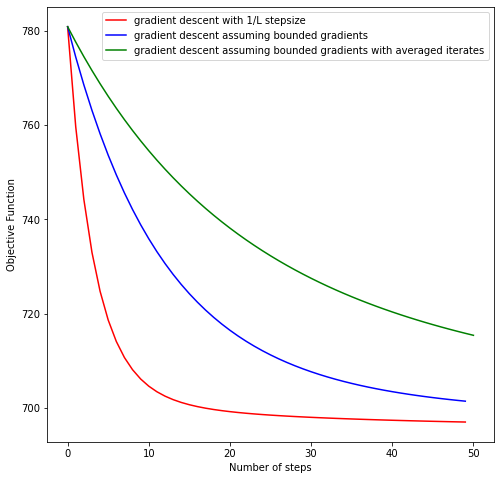

In [49]:
plt.figure(figsize=(8, 8))
plt.xlabel('Number of steps')
plt.ylabel('Objective Function')
#plt.yscale("log")
plt.plot(range(len(gradient_objectives)), gradient_objectives,'r', label='gradient descent with 1/L stepsize')
plt.plot(range(len(bd_gradient_objectives)), bd_gradient_objectives,'b', label='gradient descent assuming bounded gradients')
plt.plot(range(len(bd_gradient_objectives_averaged)), bd_gradient_objectives_averaged,'g', label='gradient descent assuming bounded gradients with averaged iterates')
plt.legend(loc='upper right')
plt.show()